# Cuda Simulator

In [1]:
"""Setup"""
import numpy as np
import sys
#from google.colab import drive
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d
import numpy as np
from matplotlib.patches import Circle, Rectangle
from mpl_toolkits.mplot3d import Axes3D
from viz_cuda import *
from optics_cuda import *

#drive.mount("/content/gdrive")
np.set_printoptions(
    edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x)
)
# the code in this notebook is formatted with Black https://black.vercel.app/ using 3.7, which is what this says:
print(sys.version)

CuPy version 11.0.0
3.8.10 (default, Jun 22 2022, 20:18:18) 
[GCC 9.4.0]


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
%%time
""" Generate some photons from the LED.

For now use Lambertian, it's pretty close.
TODO: use the Cree distribution
Say the units are like 100 microns?  so like 1mm square?
TODO: calibrate the size
TODO: calibrate the output
"""

###
photon_count = np.int32(25000000)
source_size = np.float32(10)
###
photons = LambertianSource(source_size, source_size).make_photons(photon_count)
print(f"LED emitted photons: {photons.size()}")

LED emitted photons: 25000000
CPU times: user 222 ms, sys: 40.6 ms, total: 263 ms
Wall time: 279 ms


CPU times: user 97.5 ms, sys: 300 µs, total: 97.8 ms
Wall time: 95.9 ms


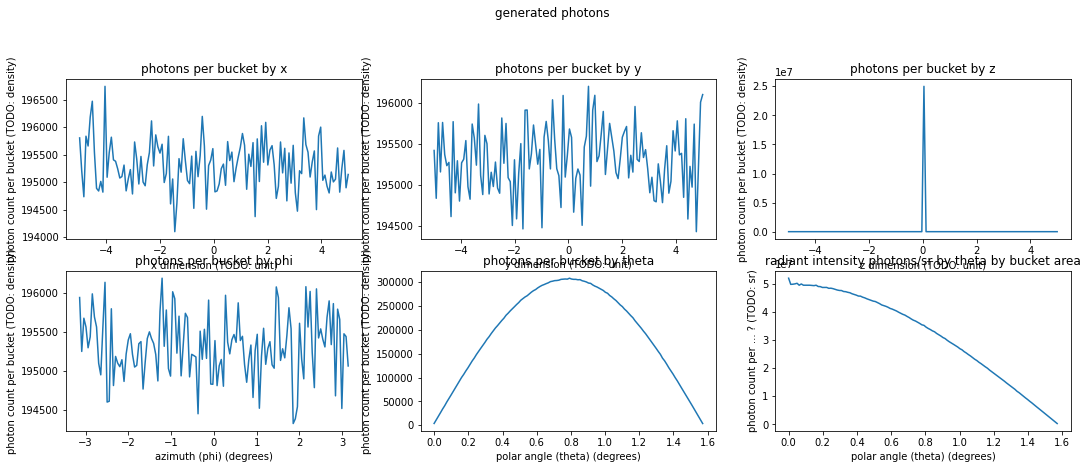

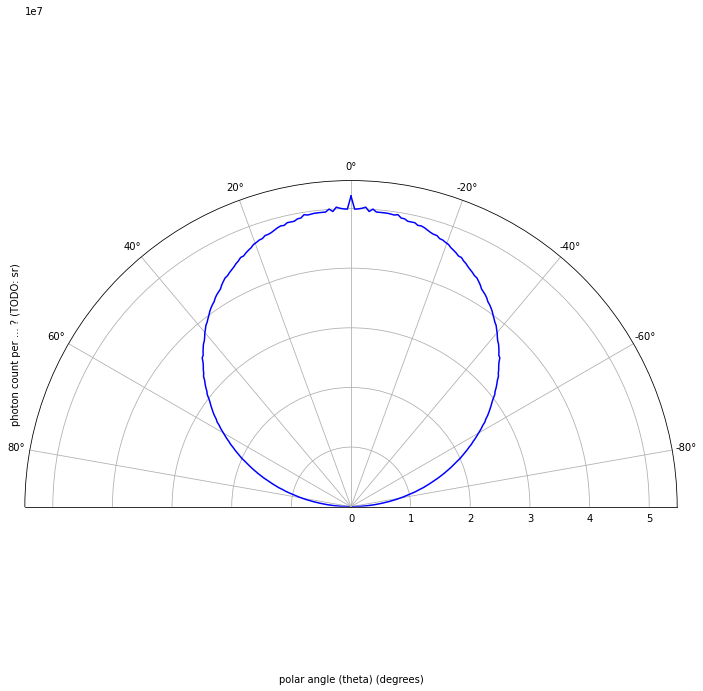

In [3]:
%%time
""" Look at the distributions of the generated photons."""
plot_histogram_slices(photons, "generated photons",
                      x_min = -source_size/2, x_max = source_size/2,
                      y_min = -source_size/2, y_max = source_size/2,
                      z_min = -5, z_max = 5,
                      theta_max = np.pi/2)

In [4]:
%%time
"""Look at the photons in 3d."""
source_box = [-source_size/2, source_size/2, -source_size/2, source_size/2, 0]
source_sample = photons.sample()
plot_3d([source_sample], ray_lengths=[1], boxes=[source_box], labels=['LED'], colors=[0xffff00])

Output()

CPU times: user 29.3 ms, sys: 213 µs, total: 29.5 ms
Wall time: 25.3 ms


In [5]:
%%time
""" Propagate the photons to the diffuser.

Most arrive at the diffuser surface.
Some are absorbed by the imperfectly reflective lightbox.
A square profile (or undersquare) helps keep the intensity even at the top. 
"""
###
lightbox_height = 400
lightbox_size = 400
###

lightbox = Lightbox(height = lightbox_height, size = lightbox_size)
lightbox.propagate(photons)
print(f"diffuser incident photons: {photons.size()}")

diffuser incident photons: 21122423
CPU times: user 3.6 s, sys: 2.47 ms, total: 3.61 s
Wall time: 3.61 s


In [6]:
%%time
box_sample = photons.sample()
lightbox_box = [-lightbox_size/2, lightbox_size/2, -lightbox_size/2, lightbox_size/2, lightbox_height]
plot_3d([source_sample, box_sample], ray_lengths=[100, 100],
        boxes=[source_box, lightbox_box], labels=['LED','lightbox'], colors=[0xffff00, 0x00ffff])

Output()

CPU times: user 39.2 ms, sys: 207 µs, total: 39.5 ms
Wall time: 33.5 ms


CPU times: user 97.1 ms, sys: 300 µs, total: 97.4 ms
Wall time: 93.1 ms


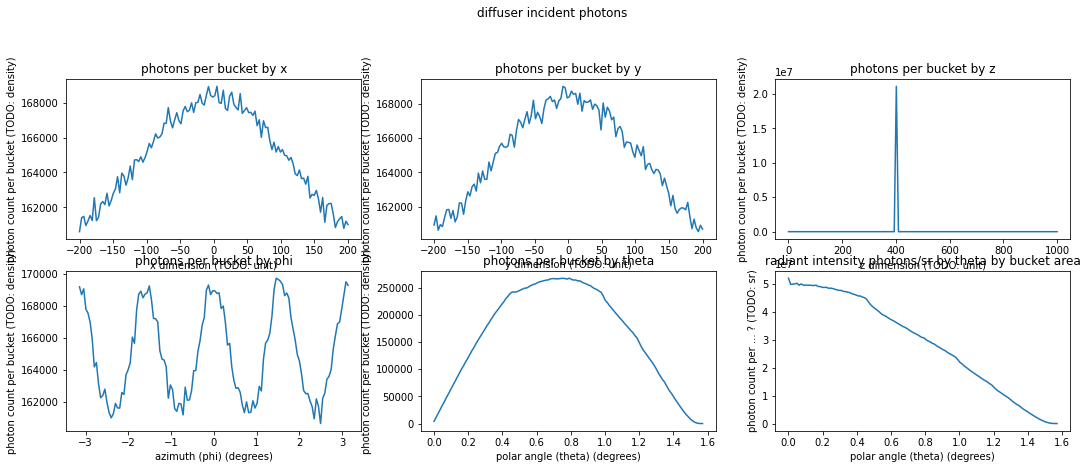

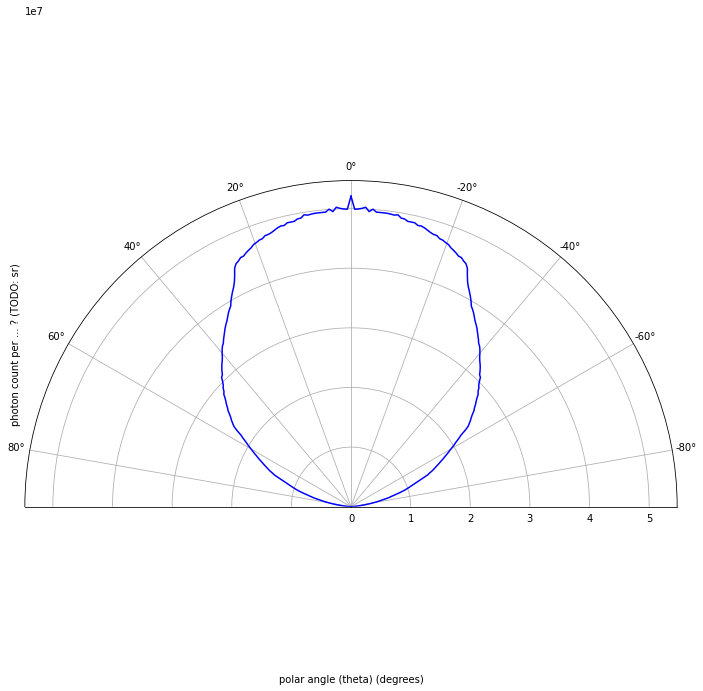

In [7]:
%%time
""" Show distributions of diffuser incident photons."""
plot_histogram_slices(photons, "diffuser incident photons",
                      x_min=-200, x_max=200,
                      y_min=-200, y_max=200,
                      z_min=0, z_max=1000, 
                      theta_max = np.pi/2)

In [ ]:
# weird scattering?
foo = get_scattering_theta(float(0.64), int(10000))
plt.hist(foo.get())
d = Diffuser(0.65, 0.25)
print(type(d._g))
print(type(d._absorption))


[-0.151 0.0777 -0.839 -0.613 0.207 -0.664 0.0116 -0.216 -0.557 -0.9 0.655 0.409 0.55 -0.752 0.141 -0.587 -0.00173 -0.469 -0.706 0.158 -0.771 -0.0105 0.295 -0.245 0.328 0.671 0.377 0.473 0.0155 -0.825 ... 0.00271 -0.249 -0.772 -0.702 0.561 -0.569 0.855 -0.179 0.0759 0.539 -0.773 -0.453 -0.673 0.113 0.858 -0.477 -0.471 -0.219 -0.24 -0.696 -0.319 0.284 -0.185 0.25 -0.624 0.291 0.74 0.347 0.68 0.598]
G
0.64
<class 'float'>
[0.979 0.342 0.812 0.951 1.07 1.08 1.15 0.259 0.201 1.12 0.41 1.15 1 0.0402 0.115 0.482 0.568 0.976 0.832 0.545 0.272 1.01 0.899 1.13 1.02 0.795 1.25 0.877 1.04 1.27 ... 0.641 1.14 0.247 0.374 0.59 0.284 0.317 0.386 0.744 0.372 0.863 0.304 0.0166 0.718 0.414 0.512 0.501 0.81 0.0513 0.724 0.0663 0.901 1.03 1.19 0.187 0.172 0.289 0.576 0.801 0.917]
[-0.318 -0.648 -0.754 0.329 -0.236 -0.0884 -0.603 -0.712 -0.522 0.204 -0.534 -0.0573 -0.474 0.171 -0.794 -0.398 -0.414 0.512 -0.356 0.378 0.131 0.525 0.748 -0.0182 -0.79 0.616 -0.903 0.315 -0.907 -0.759 ... -0.258 -0.463 -0.779 

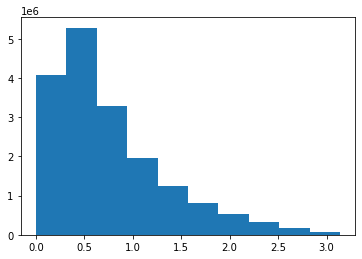

In [8]:
%%time
""" Diffuse through the diffuser. """
print(photons.ez_x)
#
photons.decimate(0.16)
size = photons.size()
phi = get_scattering_phi(size)
theta=get_scattering_theta(0.64, size)
plt.hist(theta.get())
#
diffuser = Diffuser(g = np.float32(0.64), absorption = np.float32(0.16))
#diffuser.diffuse(photons)
diffuser._diffuse(photons,theta,phi,size)
print(photons.ez_x)
print(f"diffuser-transmitted photons: {photons.size()}")

CPU times: user 128 ms, sys: 4.19 ms, total: 132 ms
Wall time: 127 ms


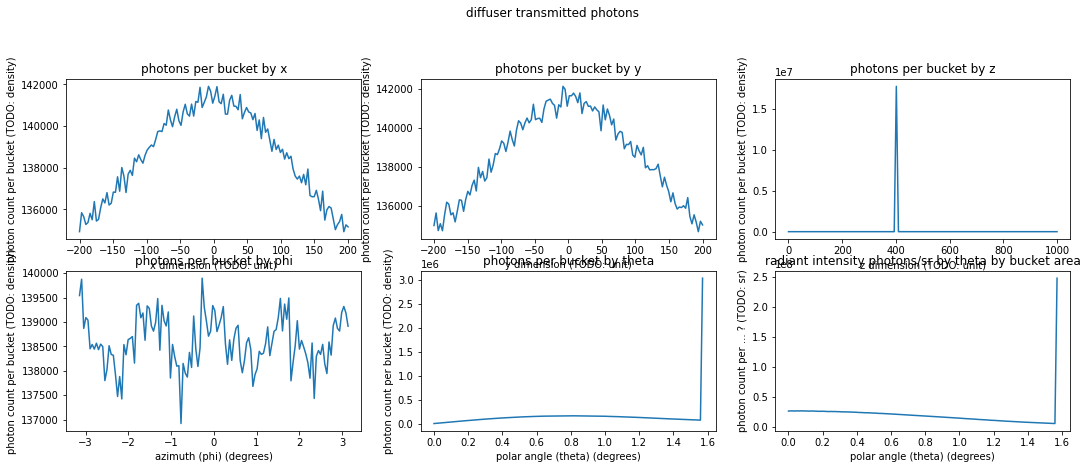

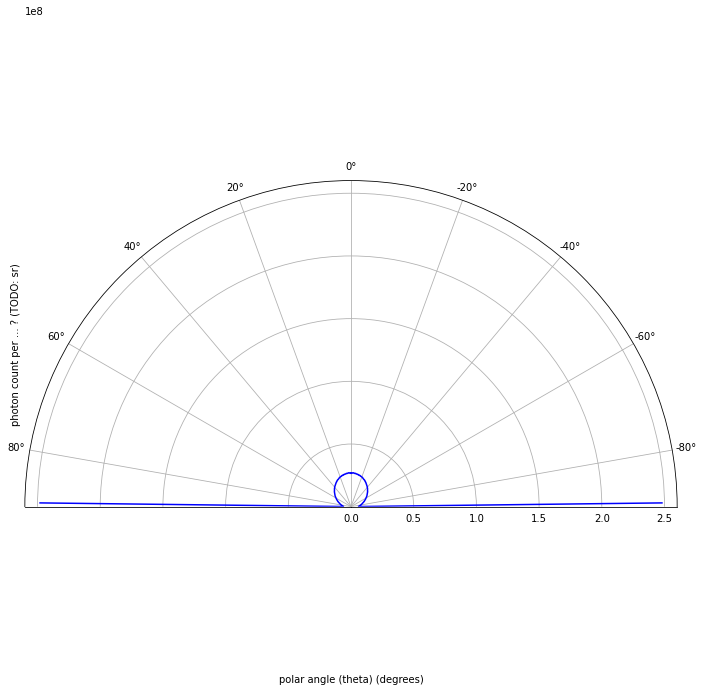

In [9]:
%%time
""" Show the distributions of photons transmitted by the diffuser.

Notice the distribution goes all the way to 180 degrees, a small fraction
of the incident photons are scattered downward.
"""
plot_histogram_slices(photons, "diffuser transmitted photons",
                      x_min=-200, x_max=200,
                      y_min=-200, y_max=200,
                      z_min=0, z_max=1000, 
                      theta_max = np.pi/2)

In [10]:
%%time
""" Show the LED-produced and diffuser-transmitted photons in 3d. """
diff_box = [-lightbox_size/2, lightbox_size/2, -lightbox_size/2, lightbox_size/2, lightbox_height+1]
diff_sample = photons.sample()
plot_3d([source_sample, box_sample, diff_sample],
        ray_lengths=[100, 100, 100],
        boxes=[source_box, lightbox_box, diff_box],
        labels=['LED', 'lightbox', 'diffuser'],
        colors=[0xffff00, 0x00ffff, 0xff00ff])

Output()

CPU times: user 41.6 ms, sys: 8.36 ms, total: 50 ms
Wall time: 42.5 ms


# ==== START HERE ====

In [ ]:
%%pyinstrument
""" Propagate diffuser-transmitted photons to the (far away) reflector. """
# min distance might be ... 10000 = 1 meter?  maybe less?
# max distance is probably ~100000 = 10 meters
# size might be 10cm square?
###
reflector_distance = 100000 # 1 m
reflector_box = [-500, 500, -500, 500, reflector_distance]
###
print(f"diffuser-transmitted photons: {Photon.countAlive(photons)}")
propagateToReflector(photons, location = reflector_distance, size = 1000)
print(f"reflector-incident photons: {Photon.countAlive(photons)}")
photons = Photon.selectAlive(photons)
print(f"alive photons: {Photon.countAlive(photons)}")
photons_at_reflector_viz = Photon.sample(photons, 1000)

In [ ]:
""" Show the distributions of reflector-incident photons """
plot_histogram_slices(photons, "reflector-incident photons", x_min=-1000, x_max=1000, y_min=-1000, y_max=1000, z_min=0, z_max=reflector_distance)

In [ ]:
""" Show the generated, diffuser-transmitted, and reflector-incident photons in 3d. """
plot_rays([photons_viz, diffused_photons_viz, photons_at_reflector_viz ], 
          elev = 10, azim = 30, size = reflector_distance, arrow_length = 500,
          rectangles=[source_box, lightbox_box, reflector_box])

In [ ]:
%%pyinstrument
""" Reflect the incident photons at the reflector. """
print(f"reflector-incident photons: {Photon.countAlive(photons)}")
reflector = Diffuser(g = -0.9925, absorption=0.0)
reflector.diffuse(photons)
print(f"reflected photons: {Photon.countAlive(photons)}")
photons = Photon.selectAlive(photons)
print(f"alive photons: {Photon.countAlive(photons)}")
reflected_photons_viz = Photon.sample(photons, 1000)

In [ ]:
""" Show the distributions of reflected photons """
plot_histogram_slices(photons, "reflected photons", x_min=-400, x_max=400, y_min=-400, y_max=400, z_min=0, z_max=reflector_distance)

In [ ]:
""" Show the generated, transmitted, reflector-incident and reflected photons in 3d. """
plot_rays([photons_viz, diffused_photons_viz, photons_at_reflector_viz, reflected_photons_viz], 
          elev = 10, azim = 30, size = reflector_distance, arrow_length = 10000,
          rectangles=[source_box, lightbox_box, reflector_box])

In [ ]:
""" Propagate the reflected photons to the camera plane. """
print(f"reflected photons: {Photon.countAlive(photons)}")
propagateToCamera(photons, location = lightbox_size) # make the camera height even with the diffuser
print(f"camera-incident photons: {Photon.countAlive(photons)}")
photons = Photon.selectAlive(photons)
print(f"alive photons: {Photon.countAlive(photons)}")
photons_at_camera_plane_viz = Photon.sample(photons, 1000)

In [ ]:
""" Show the distributions of camera-plane photons """
plot_histogram_slices(photons, "camera-plane photons", x_min=-1000, x_max=1000, y_min=-1000, y_max=1000, z_min=0, z_max=1000)

In [ ]:
""" Show the reflected photons in 3d."""
plot_rays([reflected_photons_viz, photons_at_camera_plane_viz], 
          elev = 10, azim = 30, size = reflector_distance, arrow_length = 10000,
          rectangles=[source_box, lightbox_box, reflector_box])

In [ ]:
""" Show the distributions of reflected photons, close up """
plot_histogram_slices(photons, "reflected photons", x_min=-2000, x_max=2000, y_min=-2000, y_max=2000, z_min=0, z_max=1000)

In [ ]:
""" Look closer at the neighborhood of the detector. """
plot_rays([photons_at_camera_plane_viz], 
          elev = 90, azim = 0, size = 5000, arrow_length = 1000,
          rectangles=[source_box, lightbox_box])